In [1]:
using NLOptControl
using Polynomials
using Plots
pyplot()
default(guidefont = font(17), tickfont = font(15), legendfont = font(12), titlefont = font(20))


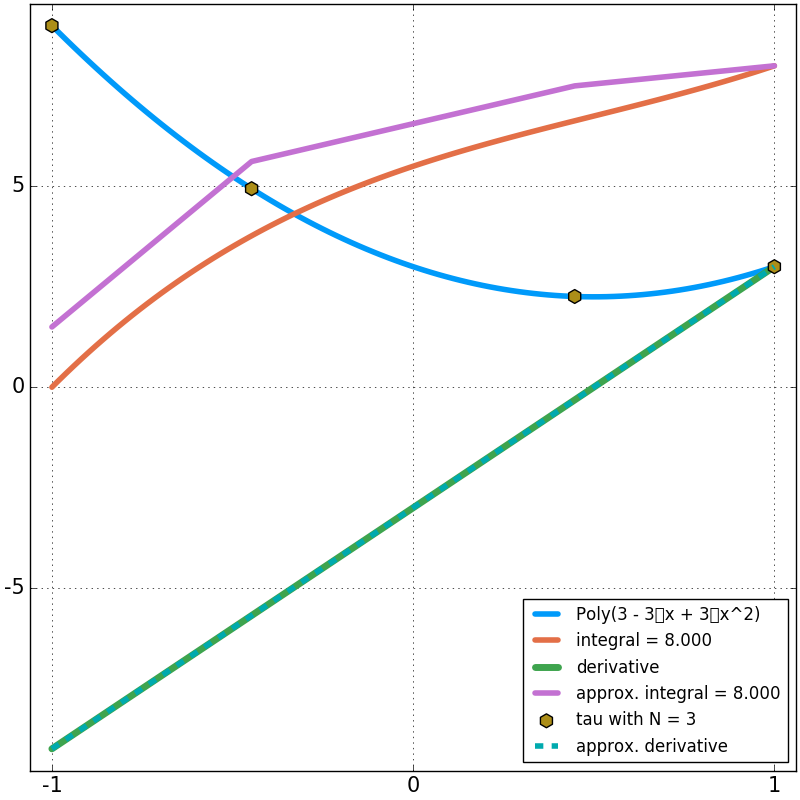

/home/febbo/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [2]:
# define the original function
x₀= Float64(-1);
xₙ= Float64(1);
x = Array(linspace(x₀,xₙ,100));
α₁ =  3;
α₂ = -3;
α₃ = -8;
α₄ =  7;
γ = Poly([α₁,α₂,α₁]);
y = polyval(γ,x)

# evaluate the integral
∫γ = polyint(γ);
Y = polyval(∫γ,x[end]) - polyval(∫γ,x[1]);
C = Y - polyval(∫γ,x[end]); # find the constant of integration
∫y = polyval(∫γ,x) + C;

# evaluate the derivative
dγ = polyder(γ);
dy = polyval(dγ,x)

# construct polynomial approximation
N = 3;  # N = 2 can exactly represent a 3rd order polynomial
if N < 2 error("Please increase N to at least 2 to include the end points for LGL!") end
τ = LGL_nodes(N);
ω = LGL_weights(τ);
D = LGL_Dmatrix(τ);

# scale the problem to the interval
xₛ = scale_tau(τ,x₀,xₙ) # scale the interval
ωₛ = scale_w(ω,x₀,xₙ)   # scale the weights

# approximate the integral
fτ = polyval(γ,xₛ)
ζ =  cumsum(ω.*fτ,1)

# approximate the derivative
D = LGL_Dmatrix(xₛ);
dζ = D*fτ;

# plot the results
plot(x,y,label=string(γ),w=4)
plot!(x,∫y,label=@sprintf("integral = %0.3f",∫y[end]),w=4)
plot!(x,dy,label="derivative",w=5)
plot!(τ,ζ,label=@sprintf("approx. integral = %0.3f",ζ[end]),w=4,size=(800,800))
scatter!(τ,fτ,label=string("tau with N = ",N),markershape = :hexagon, markersize=10)
plot!(τ, dζ, label="approx. derivative",line=(4,:dash))
#pe = (∫y[end]-ζ[end])/∫y[end]*100;
#@sprintf("The percent error is = %0.2f", pe)


In [3]:
savefig("test3a.png")

# Increase Polynomial Order to 3


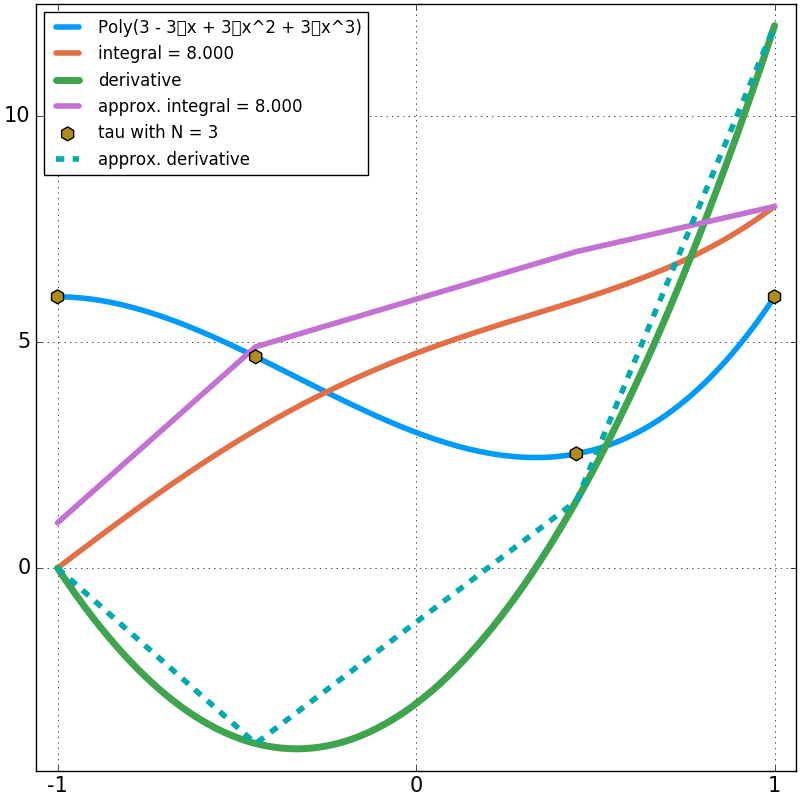

In [6]:
γ = Poly([α₁,α₂,α₁,α₁]);
y = polyval(γ,x)

# evaluate the integral
∫γ = polyint(γ);
Y = polyval(∫γ,x[end]) - polyval(∫γ,x[1]);
C = Y - polyval(∫γ,x[end]); # find the constant of integration
∫y = polyval(∫γ,x) + C;

# evaluate the derivative
dγ = polyder(γ);
dy = polyval(dγ,x)

# construct polynomial approximation
N = 3;  # N = 2 can exactly represent a 3rd order polynomial
if N < 2 error("Please increase N to at least 2 to include the end points for LGL!") end
τ = LGL_nodes(N);
ω = LGL_weights(τ);
D = LGL_Dmatrix(τ);

# scale the problem to the interval
xₛ = scale_tau(τ,x₀,xₙ) # scale the interval
ωₛ = scale_w(ω,x₀,xₙ)   # scale the weights

# approximate the integral
fτ = polyval(γ,xₛ)
ζ =  cumsum(ω.*fτ,1)

# approximate the derivative
D = LGL_Dmatrix(xₛ);
dζ = D*fτ;

# plot the results
plot(x,y,label=string(γ),w=4)
plot!(x,∫y,label=@sprintf("integral = %0.3f",∫y[end]),w=4)
plot!(x,dy,label="derivative",w=5)
plot!(τ,ζ,label=@sprintf("approx. integral = %0.3f",ζ[end]),w=4,size=(800,800))
scatter!(τ,fτ,label=string("tau with N = ",N),markershape = :hexagon, markersize=10)
plot!(τ, dζ, label="approx. derivative",line=(4,:dash))

In [7]:
savefig("test3b.png")

# Increase n in x^n


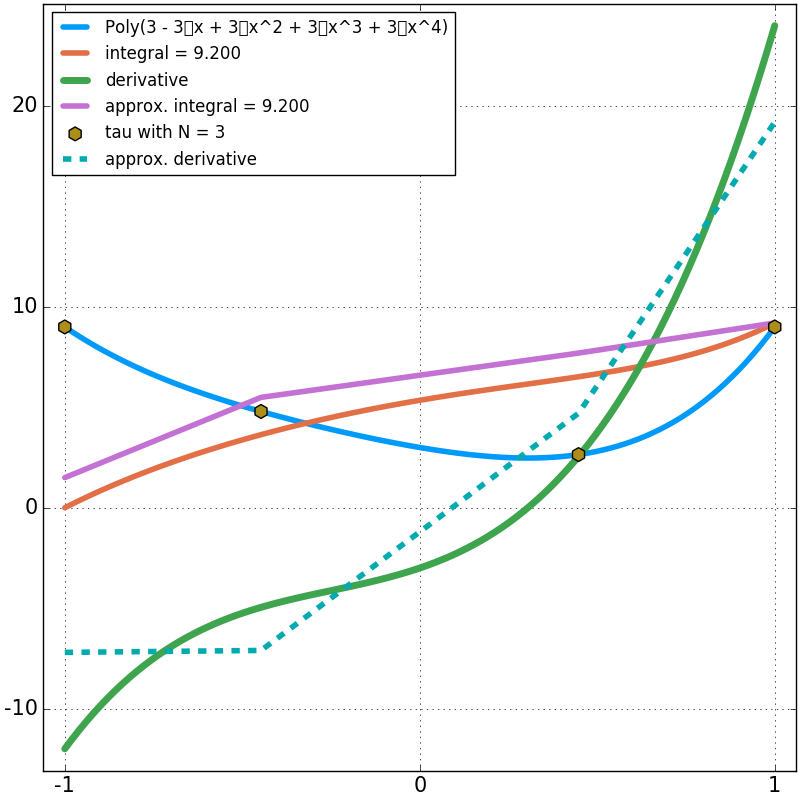

In [8]:
γ = Poly([α₁,α₂,α₁,α₁,α₁]);
y = polyval(γ,x)

# evaluate the integral
∫γ = polyint(γ);
Y = polyval(∫γ,x[end]) - polyval(∫γ,x[1]);
C = Y - polyval(∫γ,x[end]); # find the constant of integration
∫y = polyval(∫γ,x) + C;

# evaluate the derivative
dγ = polyder(γ);
dy = polyval(dγ,x)

# construct polynomial approximation
N = 3;  # N = 2 can exactly represent a 3rd order polynomial
if N < 2 error("Please increase N to at least 2 to include the end points for LGL!") end
τ = LGL_nodes(N);
ω = LGL_weights(τ);
D = LGL_Dmatrix(τ);

# scale the problem to the interval
xₛ = scale_tau(τ,x₀,xₙ) # scale the interval
ωₛ = scale_w(ω,x₀,xₙ)   # scale the weights

# approximate the integral
fτ = polyval(γ,xₛ)
ζ =  cumsum(ω.*fτ,1)

# approximate the derivative
D = LGL_Dmatrix(xₛ);
dζ = D*fτ;

# plot the results
plot(x,y,label=string(γ),w=4)
plot!(x,∫y,label=@sprintf("integral = %0.3f",∫y[end]),w=4)
plot!(x,dy,label="derivative",w=5)
plot!(τ,ζ,label=@sprintf("approx. integral = %0.3f",ζ[end]),w=4,size=(800,800))
scatter!(τ,fτ,label=string("tau with N = ",N),markershape = :hexagon, markersize=10)
plot!(τ, dζ, label="approx. derivative",line=(4,:dash))

In [9]:
savefig("test3c.png")

# Increase n in x^n


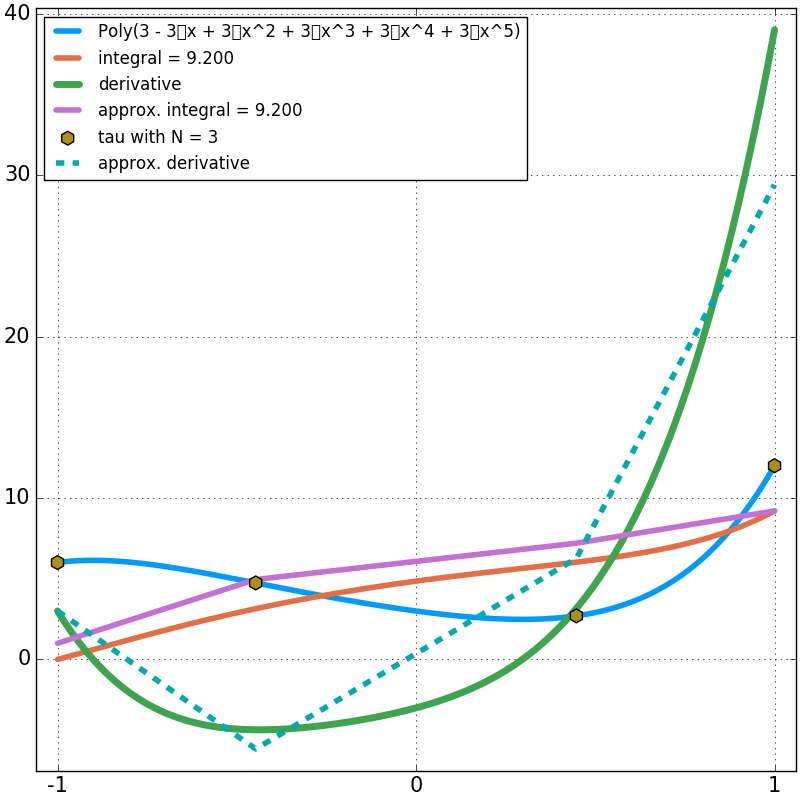

In [10]:
γ = Poly([α₁,α₂,α₁,α₁,α₁,α₁]);
y = polyval(γ,x)

# evaluate the integral
∫γ = polyint(γ);
Y = polyval(∫γ,x[end]) - polyval(∫γ,x[1]);
C = Y - polyval(∫γ,x[end]); # find the constant of integration
∫y = polyval(∫γ,x) + C;

# evaluate the derivative
dγ = polyder(γ);
dy = polyval(dγ,x)

# construct polynomial approximation
N = 3;  # N = 2 can exactly represent a 3rd order polynomial
if N < 2 error("Please increase N to at least 2 to include the end points for LGL!") end
τ = LGL_nodes(N);
ω = LGL_weights(τ);
D = LGL_Dmatrix(τ);

# scale the problem to the interval
xₛ = scale_tau(τ,x₀,xₙ) # scale the interval
ωₛ = scale_w(ω,x₀,xₙ)   # scale the weights

# approximate the integral
fτ = polyval(γ,xₛ)
ζ =  cumsum(ω.*fτ,1)

# approximate the derivative
D = LGL_Dmatrix(xₛ);
dζ = D*fτ;

# plot the results
plot(x,y,label=string(γ),w=4)
plot!(x,∫y,label=@sprintf("integral = %0.3f",∫y[end]),w=4)
plot!(x,dy,label="derivative",w=5)
plot!(τ,ζ,label=@sprintf("approx. integral = %0.3f",ζ[end]),w=4,size=(800,800))
scatter!(τ,fτ,label=string("tau with N = ",N),markershape = :hexagon, markersize=10)
plot!(τ, dζ, label="approx. derivative",line=(4,:dash))

In [13]:
pe = (∫y[end]-ζ[end])/∫y[end]*100;
@sprintf("The percent error is = %0.18f", pe)

"The percent error is = 0.000000000000000000"

In [11]:
savefig("test3d.png")


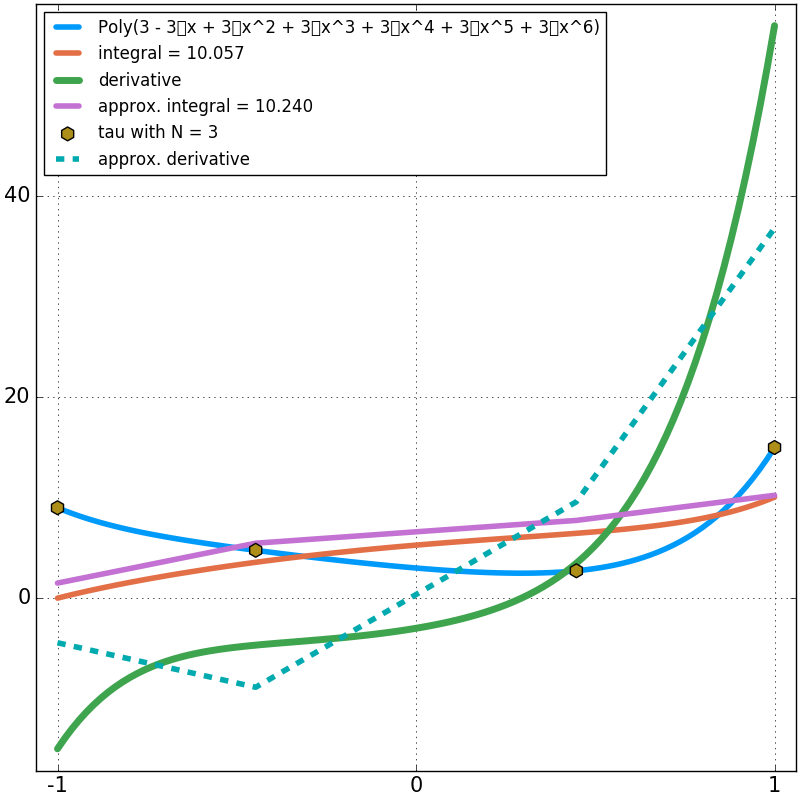

In [16]:
γ = Poly([α₁,α₂,α₁,α₁,α₁,α₁,α₁]);
y = polyval(γ,x)

# evaluate the integral
∫γ = polyint(γ);
Y = polyval(∫γ,x[end]) - polyval(∫γ,x[1]);
C = Y - polyval(∫γ,x[end]); # find the constant of integration
∫y = polyval(∫γ,x) + C;

# evaluate the derivative
dγ = polyder(γ);
dy = polyval(dγ,x)

# construct polynomial approximation
N = 3;  # N = 2 can exactly represent a 3rd order polynomial
if N < 2 error("Please increase N to at least 2 to include the end points for LGL!") end
τ = LGL_nodes(N);
ω = LGL_weights(τ);
D = LGL_Dmatrix(τ);

# scale the problem to the interval
xₛ = scale_tau(τ,x₀,xₙ) # scale the interval
ωₛ = scale_w(ω,x₀,xₙ)   # scale the weights

# approximate the integral
fτ = polyval(γ,xₛ)
ζ =  cumsum(ω.*fτ,1)

# approximate the derivative
D = LGL_Dmatrix(xₛ);
dζ = D*fτ;

# plot the results
plot(x,y,label=string(γ),w=4)
plot!(x,∫y,label=@sprintf("integral = %0.3f",∫y[end]),w=4)
plot!(x,dy,label="derivative",w=5)
plot!(τ,ζ,label=@sprintf("approx. integral = %0.3f",ζ[end]),w=4,size=(800,800))
scatter!(τ,fτ,label=string("tau with N = ",N),markershape = :hexagon, markersize=10)
plot!(τ, dζ, label="approx. derivative",line=(4,:dash))


In [17]:
savefig("test3e.png")

In [15]:
pe = (∫y[end]-ζ[end])/∫y[end]*100;
@sprintf("The percent error is = %0.18f", pe)

"The percent error is = -1.818181818181822340"